<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Рассчитать-индексы-сезонности-по-месяцам-2014-2015-в-разрезе-групп-городов" data-toc-modified-id="Рассчитать-индексы-сезонности-по-месяцам-2014-2015-в-разрезе-групп-городов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Рассчитать индексы сезонности по месяцам 2014-2015 в разрезе групп городов</a></span></li><li><span><a href="#Вычислить-прирост-по-сопоставимым-объектам-2015-к-2014-итого-и-в-разрезе-групп-городов" data-toc-modified-id="Вычислить-прирост-по-сопоставимым-объектам-2015-к-2014-итого-и-в-разрезе-групп-городов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вычислить прирост по сопоставимым объектам 2015 к 2014 итого и в разрезе групп городов</a></span><ul class="toc-item"><li><span><a href="#по-отдельным-магазинам" data-toc-modified-id="по-отдельным-магазинам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>по отдельным магазинам</a></span></li><li><span><a href="#по-группам-городов" data-toc-modified-id="по-группам-городов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>по группам городов</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import datetime 
from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline
figsize = (17,8)

from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style='whitegrid')
import time

pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 20) 
pd.set_option('display.width', 20) 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit



In [2]:
def df_info(df):
    display(df.shape)
    display(df.head(5))
    display(df.info())
    display(df.describe())
    print('Дубликаты')
    print(df[df.duplicated(keep="first")].count())
    print()
    print('Пропуски')
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100), sep=''))

In [3]:
df = pd.read_excel('datasets/test.xlsx', parse_dates=True)

In [4]:
df.head()

,ГруппаГородов,Наименование,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00
0,Группа Центр,Магазин1,2051471.82,2.088814e+06,2608636.43,1565837.40,1.960246e+06,2300439.0,2936732.0,2.691153e+06,2.306721e+06,2310321.0,2.316974e+06,4283870.00,2522452.00,2189702.0,2776494.0,1755103.00,1671256.0,2140830.00,2745071.00,2632203.15,2394626.00,2313150.0,2116280.0,3733057.0
1,Группа Центр,Магазин2,1056850.65,1.030067e+06,1222410.00,834458.00,7.410119e+05,904829.0,1128726.0,9.909854e+05,7.857755e+05,953814.0,1.043476e+06,1890696.10,980394.00,1010764.0,981789.0,827937.00,653909.0,800825.00,898351.00,1105953.00,740972.00,957128.0,926492.0,1536261.0
2,Группа Центр,Магазин3,2962284.04,3.752589e+06,4902779.59,3048335.00,2.791383e+06,3688463.0,3939424.5,3.066854e+06,3.340698e+06,2943383.0,2.696018e+06,6495887.00,3463449.00,3394834.0,3697708.0,2966511.00,2519220.0,2835232.00,2962883.00,2772081.25,2625504.00,2571363.0,2998352.0,4872285.0
3,Группа Центр,Магазин4,2558608.27,2.600523e+06,3335103.19,2456693.60,2.821844e+06,3434487.0,3545213.0,3.829394e+06,2.865735e+06,3005159.0,3.302328e+06,4715654.50,2893357.55,2360918.0,2986211.0,1826463.00,2241688.0,2612168.16,2887199.00,3102668.00,2791696.00,2609489.0,2076329.0,4041529.0
4,Группа Центр,Магазин5,1996708.23,1.910105e+06,2561086.10,1510640.31,1.621828e+06,2339605.5,2245275.5,2.739182e+06,2.174367e+06,1728746.0,1.904784e+06,4319821.95,2591395.00,2230184.0,2782146.0,1609679.11,1978687.0,2092655.00,2605989.05,3118748.70,2177609.15,2143155.0,2123343.0,4429868.0


In [5]:
date_index = list(df.columns)[2:]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ГруппаГородов        621 non-null    object 
 1   Наименование         621 non-null    object 
 2   2014-01-01 00:00:00  388 non-null    float64
 3   2014-02-01 00:00:00  401 non-null    float64
 4   2014-03-01 00:00:00  401 non-null    float64
 5   2014-04-01 00:00:00  420 non-null    float64
 6   2014-05-01 00:00:00  450 non-null    float64
 7   2014-06-01 00:00:00  474 non-null    float64
 8   2014-07-01 00:00:00  485 non-null    float64
 9   2014-08-01 00:00:00  499 non-null    float64
 10  2014-09-01 00:00:00  503 non-null    float64
 11  2014-10-01 00:00:00  505 non-null    float64
 12  2014-11-01 00:00:00  518 non-null    float64
 13  2014-12-01 00:00:00  529 non-null    float64
 14  2015-01-01 00:00:00  546 non-null    float64
 15  2015-02-01 00:00:00  543 non-null    flo

In [7]:
df_info(df)

(621, 26)

,ГруппаГородов,Наименование,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00
0,Группа Центр,Магазин1,2051471.82,2.088814e+06,2608636.43,1565837.40,1.960246e+06,2300439.0,2936732.0,2.691153e+06,2.306721e+06,2310321.0,2.316974e+06,4283870.00,2522452.00,2189702.0,2776494.0,1755103.00,1671256.0,2140830.00,2745071.00,2632203.15,2394626.00,2313150.0,2116280.0,3733057.0
1,Группа Центр,Магазин2,1056850.65,1.030067e+06,1222410.00,834458.00,7.410119e+05,904829.0,1128726.0,9.909854e+05,7.857755e+05,953814.0,1.043476e+06,1890696.10,980394.00,1010764.0,981789.0,827937.00,653909.0,800825.00,898351.00,1105953.00,740972.00,957128.0,926492.0,1536261.0
2,Группа Центр,Магазин3,2962284.04,3.752589e+06,4902779.59,3048335.00,2.791383e+06,3688463.0,3939424.5,3.066854e+06,3.340698e+06,2943383.0,2.696018e+06,6495887.00,3463449.00,3394834.0,3697708.0,2966511.00,2519220.0,2835232.00,2962883.00,2772081.25,2625504.00,2571363.0,2998352.0,4872285.0
3,Группа Центр,Магазин4,2558608.27,2.600523e+06,3335103.19,2456693.60,2.821844e+06,3434487.0,3545213.0,3.829394e+06,2.865735e+06,3005159.0,3.302328e+06,4715654.50,2893357.55,2360918.0,2986211.0,1826463.00,2241688.0,2612168.16,2887199.00,3102668.00,2791696.00,2609489.0,2076329.0,4041529.0
4,Группа Центр,Магазин5,1996708.23,1.910105e+06,2561086.10,1510640.31,1.621828e+06,2339605.5,2245275.5,2.739182e+06,2.174367e+06,1728746.0,1.904784e+06,4319821.95,2591395.00,2230184.0,2782146.0,1609679.11,1978687.0,2092655.00,2605989.05,3118748.70,2177609.15,2143155.0,2123343.0,4429868.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ГруппаГородов        621 non-null    object 
 1   Наименование         621 non-null    object 
 2   2014-01-01 00:00:00  388 non-null    float64
 3   2014-02-01 00:00:00  401 non-null    float64
 4   2014-03-01 00:00:00  401 non-null    float64
 5   2014-04-01 00:00:00  420 non-null    float64
 6   2014-05-01 00:00:00  450 non-null    float64
 7   2014-06-01 00:00:00  474 non-null    float64
 8   2014-07-01 00:00:00  485 non-null    float64
 9   2014-08-01 00:00:00  499 non-null    float64
 10  2014-09-01 00:00:00  503 non-null    float64
 11  2014-10-01 00:00:00  505 non-null    float64
 12  2014-11-01 00:00:00  518 non-null    float64
 13  2014-12-01 00:00:00  529 non-null    float64
 14  2015-01-01 00:00:00  546 non-null    float64
 15  2015-02-01 00:00:00  543 non-null    flo

None

,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00
count,3.880000e+02,4.010000e+02,4.010000e+02,4.200000e+02,4.500000e+02,4.740000e+02,4.850000e+02,4.990000e+02,5.030000e+02,5.050000e+02,5.180000e+02,5.290000e+02,5.460000e+02,5.430000e+02,5.500000e+02,5.560000e+02,5.590000e+02,5.640000e+02,5.920000e+02,5.970000e+02,6.030000e+02,5.880000e+02,5.950000e+02,5.970000e+02
mean,2.175320e+06,2.203177e+06,3.031571e+06,1.902760e+06,2.012756e+06,2.293688e+06,2.645649e+06,2.645892e+06,2.289201e+06,2.155542e+06,2.240586e+06,5.012013e+06,2.372989e+06,2.198162e+06,2.645809e+06,1.693091e+06,1.856909e+06,1.940796e+06,2.144079e+06,2.336618e+06,2.068707e+06,1.957484e+06,1.930128e+06,3.799227e+06
std,9.769698e+05,1.096608e+06,1.393250e+06,8.953074e+05,9.626924e+05,1.060445e+06,1.213659e+06,1.271278e+06,1.159895e+06,1.026346e+06,1.079785e+06,2.658003e+06,1.233722e+06,1.225569e+06,1.483923e+06,9.633298e+05,1.058270e+06,1.061035e+06,1.293444e+06,1.439532e+06,1.231897e+06,1.068666e+06,1.061532e+06,2.095342e+06
min,1.444500e+04,1.575211e+05,5.799460e+05,3.098820e+05,2.402500e+04,2.741200e+04,3.581600e+04,2.427310e+04,0.000000e+00,0.000000e+00,7.009241e+04,0.000000e+00,0.000000e+00,4.093200e+04,0.000000e+00,5.750900e+04,3.603000e+04,4.800600e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.851400e+04,1.819300e+04,6.556000e+04
25%,1.551901e+06,1.487845e+06,2.096232e+06,1.315647e+06,1.373994e+06,1.612342e+06,1.870942e+06,1.815818e+06,1.502617e+06,1.454418e+06,1.526535e+06,3.279433e+06,1.579549e+06,1.398780e+06,1.675565e+06,1.054471e+06,1.128816e+06,1.235528e+06,1.333102e+06,1.378048e+06,1.271088e+06,1.195223e+06,1.227380e+06,2.416275e+06
50%,2.027344e+06,1.998244e+06,2.781071e+06,1.700176e+06,1.872609e+06,2.155005e+06,2.443131e+06,2.480093e+06,2.077491e+06,1.966616e+06,2.082556e+06,4.438868e+06,2.161278e+06,1.955365e+06,2.418933e+06,1.506840e+06,1.675209e+06,1.755795e+06,1.922066e+06,2.107406e+06,1.868923e+06,1.787566e+06,1.709247e+06,3.446934e+06
75%,2.607036e+06,2.683443e+06,3.624304e+06,2.311925e+06,2.449169e+06,2.866398e+06,3.215102e+06,3.242156e+06,2.871642e+06,2.628829e+06,2.720991e+06,6.241427e+06,2.938922e+06,2.762342e+06,3.245147e+06,2.095780e+06,2.371564e+06,2.431523e+06,2.775983e+06,3.102668e+06,2.715294e+06,2.542838e+06,2.465363e+06,4.857107e+06
max,7.675533e+06,9.271975e+06,1.209690e+07,6.718125e+06,7.895126e+06,6.700094e+06,7.843303e+06,8.468359e+06,7.793828e+06,6.573362e+06,7.078462e+06,1.951878e+07,1.031201e+07,8.945641e+06,1.063696e+07,7.116654e+06,7.648606e+06,7.192127e+06,9.130781e+06,8.885002e+06,7.012623e+06,7.412053e+06,7.614741e+06,1.307454e+07


Дубликаты
ГруппаГородов          0
Наименование           0
2014-01-01 00:00:00    0
2014-02-01 00:00:00    0
2014-03-01 00:00:00    0
                      ..
2015-08-01 00:00:00    0
2015-09-01 00:00:00    0
2015-10-01 00:00:00    0
2015-11-01 00:00:00    0
2015-12-01 00:00:00    0
Length: 26, dtype: int64

Пропуски
ГруппаГородов - 0%
Наименование - 0%
2014-01-01 00:00:00 - 38%
2014-02-01 00:00:00 - 35%
2014-03-01 00:00:00 - 35%
2014-04-01 00:00:00 - 32%
2014-05-01 00:00:00 - 28%
2014-06-01 00:00:00 - 24%
2014-07-01 00:00:00 - 22%
2014-08-01 00:00:00 - 20%
2014-09-01 00:00:00 - 19%
2014-10-01 00:00:00 - 19%
2014-11-01 00:00:00 - 17%
2014-12-01 00:00:00 - 15%
2015-01-01 00:00:00 - 12%
2015-02-01 00:00:00 - 13%
2015-03-01 00:00:00 - 11%
2015-04-01 00:00:00 - 10%
2015-05-01 00:00:00 - 10%
2015-06-01 00:00:00 - 9%
2015-07-01 00:00:00 - 5%
2015-08-01 00:00:00 - 4%
2015-09-01 00:00:00 - 3%
2015-10-01 00:00:00 - 5%
2015-11-01 00:00:00 - 4%
2015-12-01 00:00:00 - 4%


От пропусков в данных избавимся на 2 этапе, когда оставим только сопоставимые единицы.

Проведим технические дублирования:

In [8]:
df['Наименование'].value_counts().sort_values(ascending=False)

Магазин1      1
Магазин9      1
Магазин18     1
Магазин3      1
Магазин4      1
             ..
Магазин616    1
Магазин617    1
Магазин618    1
Магазин619    1
Магазин621    1
Name: Наименование, Length: 621, dtype: int64

In [9]:
df['ГруппаГородов'].unique()

array(['Группа Центр', 'Группа Сибирь', 'Группа Север', 'Группа Улан-Удэ',
       'Группа Приморских  объектов', 'Группа Волгоград', 'Группа Ростов',
       'Группа  Кавказских республик', 'Группа Астрахань',
       'Группа Новороссийск', 'группа юг', 'Группа Ессентуки',
       'Группа Пятигорск', 'Группа Ейск', 'Группа Юг', 'Группа СПБ',
       'Группа Абакан'], dtype=object)

Уберем дублирование в названиях групп (группа юг)

In [10]:
df.loc[df['ГруппаГородов']=='группа юг', 'ГруппаГородов'] = 'Группа Юг'

In [11]:
df['ГруппаГородов'].unique()

array(['Группа Центр', 'Группа Сибирь', 'Группа Север', 'Группа Улан-Удэ',
       'Группа Приморских  объектов', 'Группа Волгоград', 'Группа Ростов',
       'Группа  Кавказских республик', 'Группа Астрахань',
       'Группа Новороссийск', 'Группа Юг', 'Группа Ессентуки',
       'Группа Пятигорск', 'Группа Ейск', 'Группа СПБ', 'Группа Абакан'],
      dtype=object)

## Рассчитать индексы сезонности по месяцам 2014-2015 в разрезе групп городов

Для этой задачи данные слишком детализированы, агрегируем по группам городов и приведем датасет в нужный вид.

In [12]:
first = df.pivot_table(index=['ГруппаГородов'], values = date_index, aggfunc='sum').reset_index().T
first.columns = first.iloc[0].to_list()
first.drop(labels = 'ГруппаГородов', axis = 0, inplace=True)
first.index = pd.to_datetime(first.index)

In [13]:
first.head(5)

,Группа Кавказских республик,Группа Абакан,Группа Астрахань,Группа Волгоград,Группа Ейск,Группа Ессентуки,Группа Новороссийск,Группа Приморских объектов,Группа Пятигорск,Группа Ростов,Группа СПБ,Группа Север,Группа Сибирь,Группа Улан-Удэ,Группа Центр,Группа Юг
2014-01-01,22364316.35,5025913.21,16513540.38,31400438.61,4767885.67,1817022.2,9434949.47,37586808.73,6976293.5,75173416.74,61207324.45,78643252.04,274263362.09,15581667.79,136347217.67,66920774.36
2014-02-01,21434669.521387,5830502.45412,14919235.387924,31706491.489083,5046409.938633,1508596.590626,9025609.772988,45495446.913921,6007443.420173,78021917.084369,71714625.392453,96243120.158338,276604847.360436,12636159.280381,137396965.105916,69881847.727118
2014-03-01,31262568.88,9199788.31,22961749.89,41843045.31,6949743.45,2493003.0,12598567.5,56678065.81,7866242.19,104136831.94,97871496.66,135312359.57,381101690.36,18702362.25,186218364.91,100463950.19
2014-04-01,20526970.46,4962753.3,16800760.93,26477562.36,5228965.92,1619087.0,7316894.0,32495420.13,5858173.5,72649387.38,59427061.28,85861698.29,245901982.22,10662382.78,129326886.3,74043380.03
2014-05-01,20988088.074558,5428055.749135,17799843.433422,29527879.01662,5985809.777888,1783466.685425,7894958.609809,32464338.171917,5985160.686111,80051271.423014,70394866.193723,107345446.34609,274616763.970511,10992574.900232,150645387.137946,83836448.363974


In [14]:
first.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2014-01-01 to 2015-12-01
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Группа  Кавказских республик  24 non-null     object
 1   Группа Абакан                 24 non-null     object
 2   Группа Астрахань              24 non-null     object
 3   Группа Волгоград              24 non-null     object
 4   Группа Ейск                   24 non-null     object
 5   Группа Ессентуки              24 non-null     object
 6   Группа Новороссийск           24 non-null     object
 7   Группа Приморских  объектов   24 non-null     object
 8   Группа Пятигорск              24 non-null     object
 9   Группа Ростов                 24 non-null     object
 10  Группа СПБ                    24 non-null     object
 11  Группа Север                  24 non-null     object
 12  Группа Сибирь                 24 non-null     object
 13  Гр

Приступим к сезонности. 

In [15]:
# figsize = (17,8)
# first['Группа  Кавказских республик'].plot(figsize=figsize)

In [16]:
first['Группа  Кавказских республик']

2014-01-01        22364316.35
2014-02-01    21434669.521387
2014-03-01        31262568.88
2014-04-01        20526970.46
2014-05-01    20988088.074558
                   ...       
2015-08-01         28853726.0
2015-09-01        27508288.05
2015-10-01         25394444.0
2015-11-01         24211842.0
2015-12-01         38638605.0
Name: Группа  Кавказских республик, Length: 24, dtype: object

Группа  Кавказских республик
seasonal


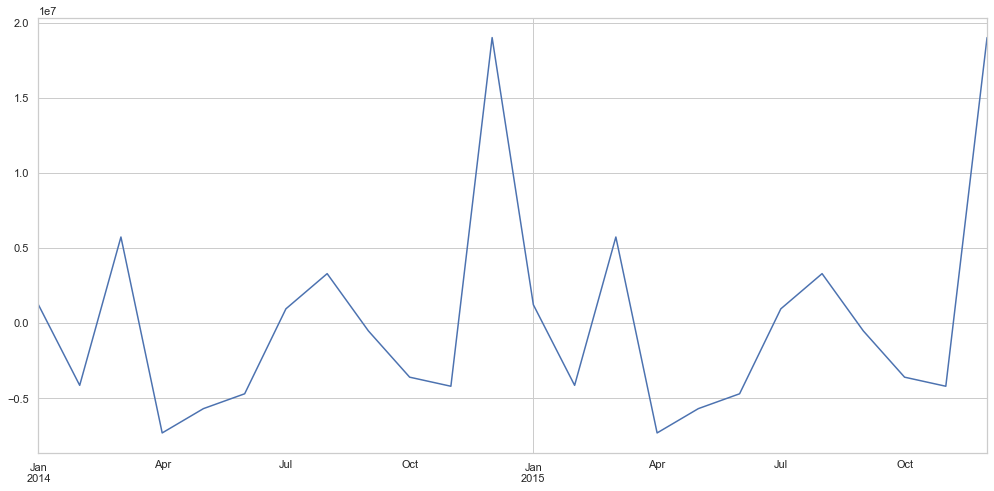

Группа Абакан
seasonal


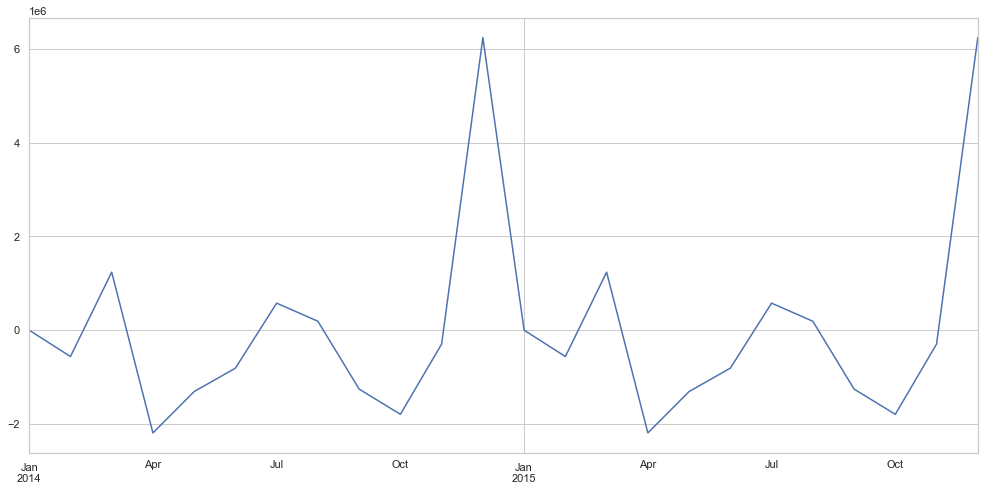

Группа Астрахань
seasonal


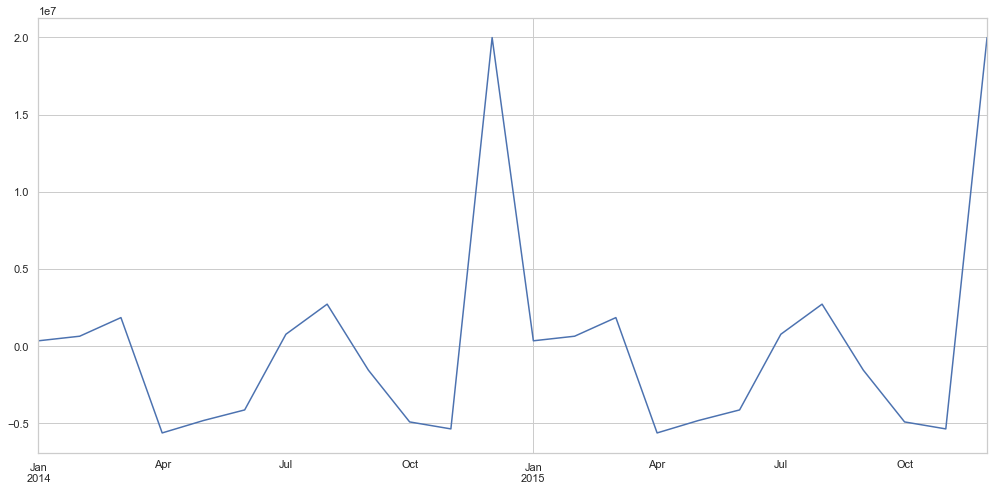

Группа Волгоград
seasonal


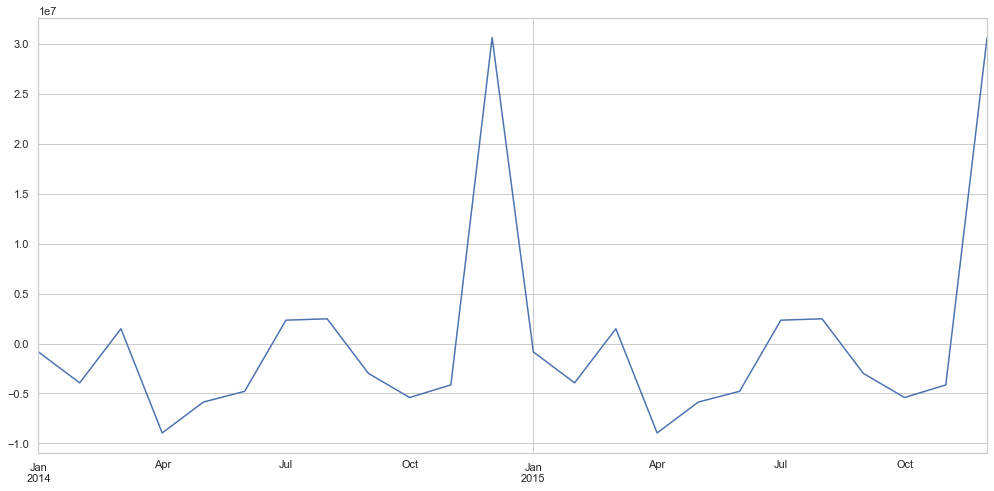

Группа Ейск
seasonal


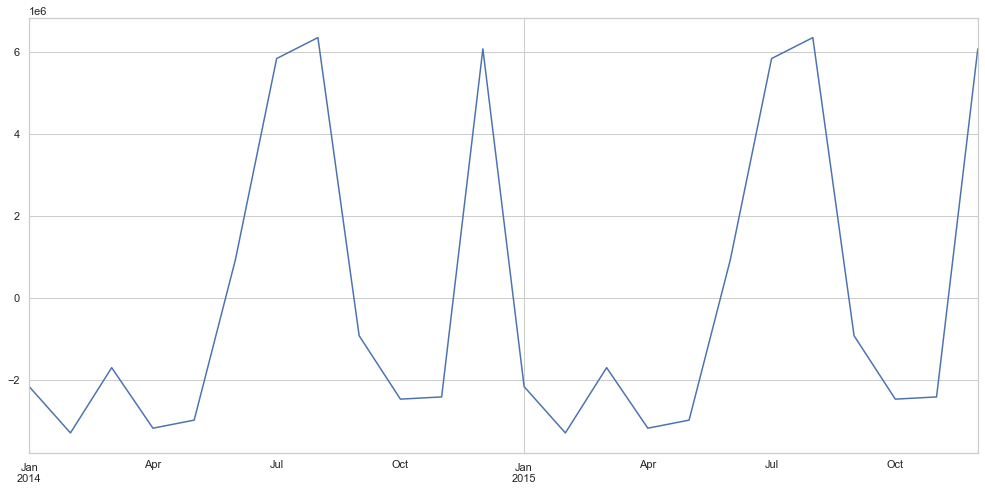

Группа Ессентуки
seasonal


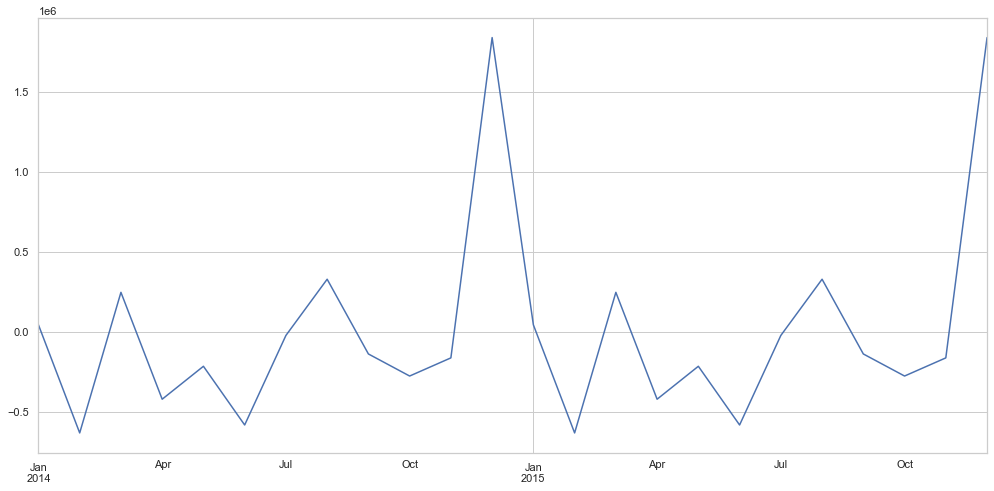

Группа Новороссийск
seasonal


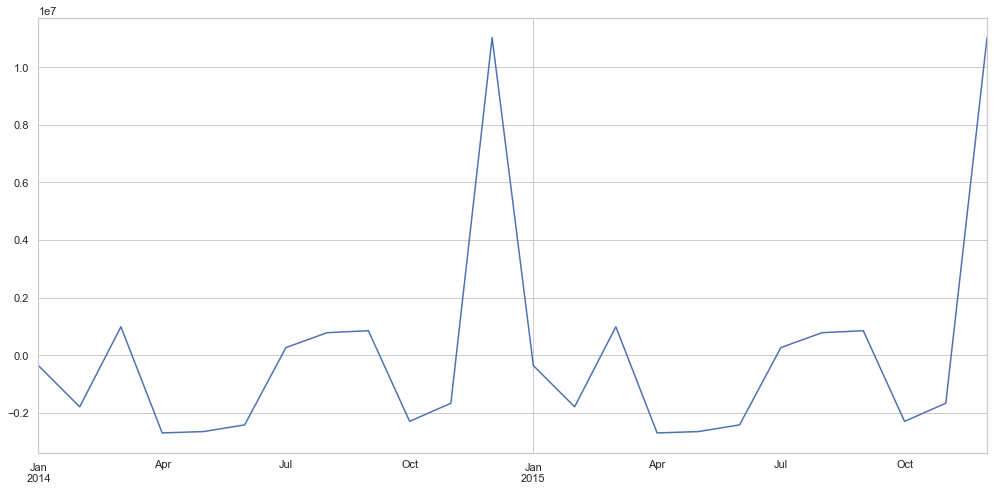

Группа Приморских  объектов
seasonal


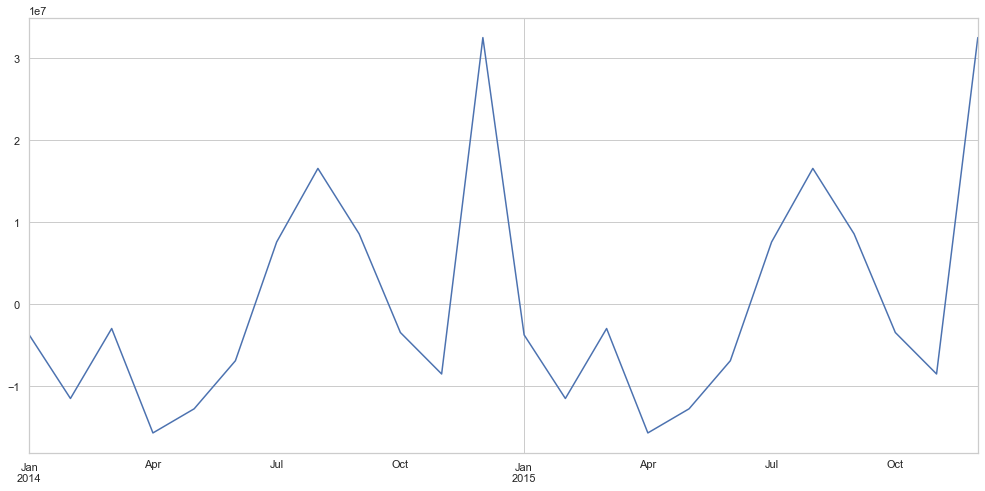

Группа Пятигорск
seasonal


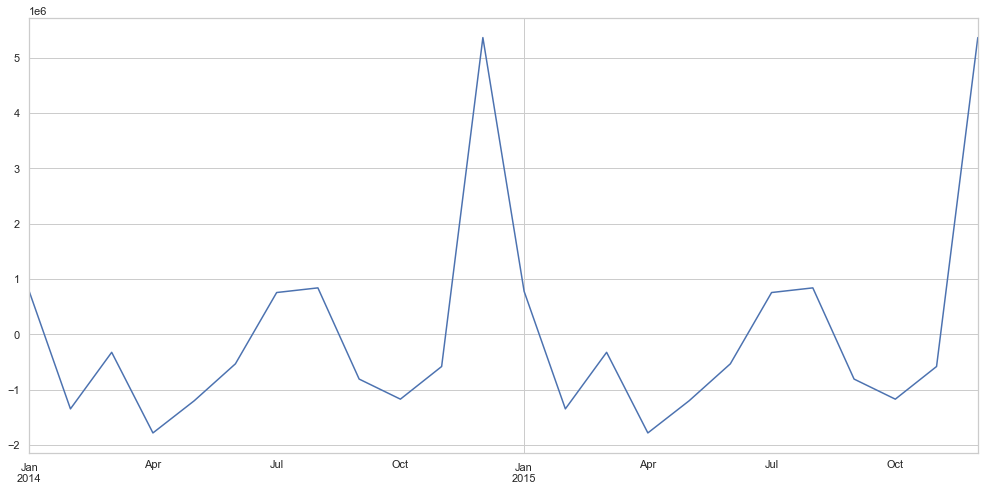

Группа Ростов
seasonal


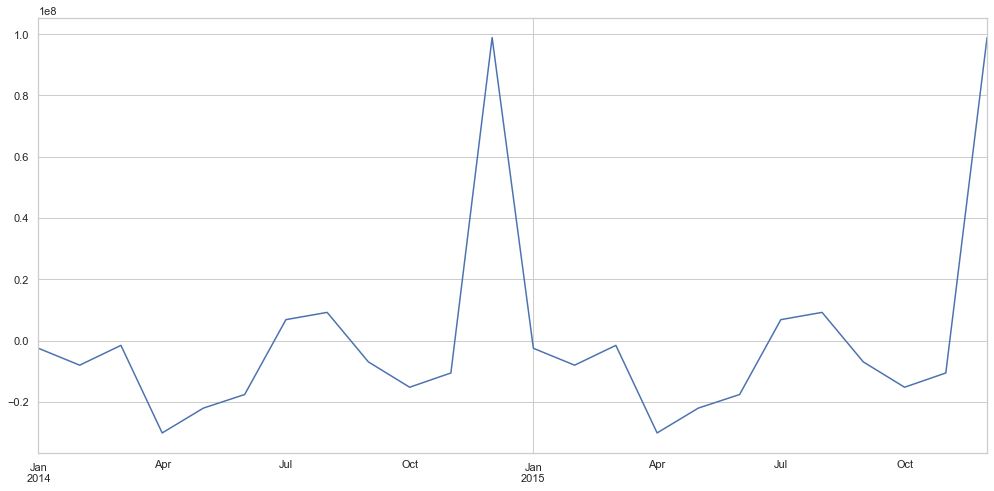

Группа СПБ
seasonal


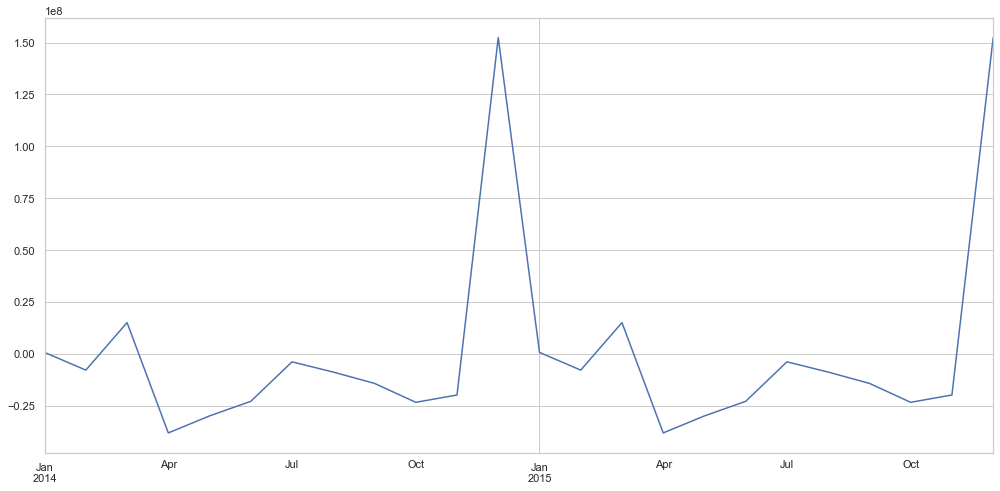

Группа Север
seasonal


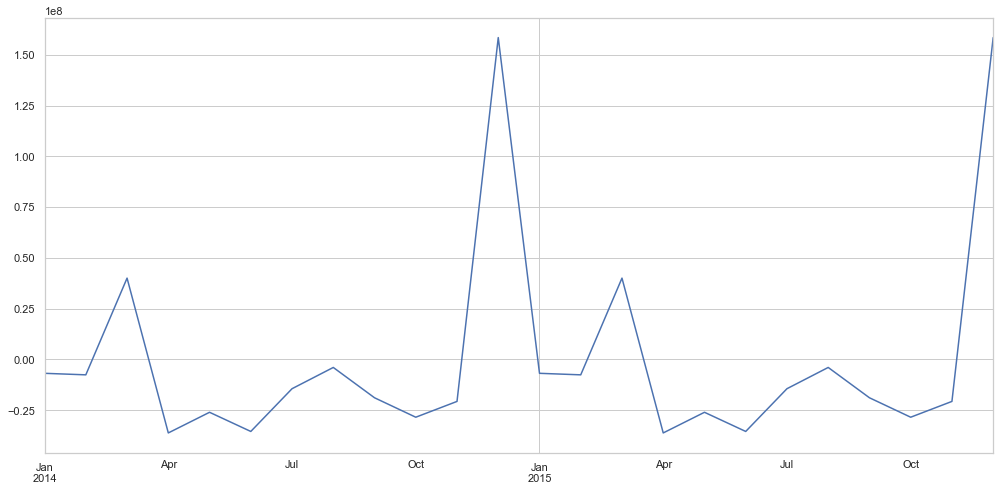

Группа Сибирь
seasonal


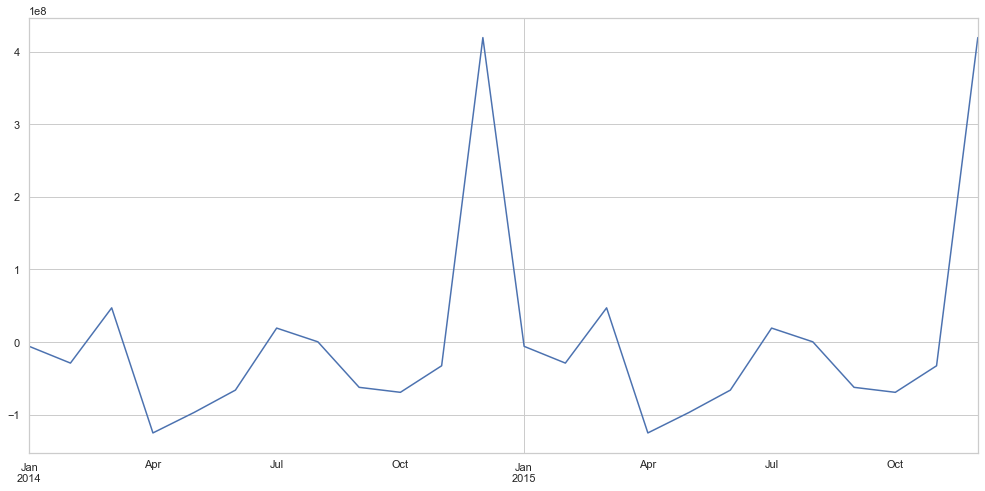

Группа Улан-Удэ
seasonal


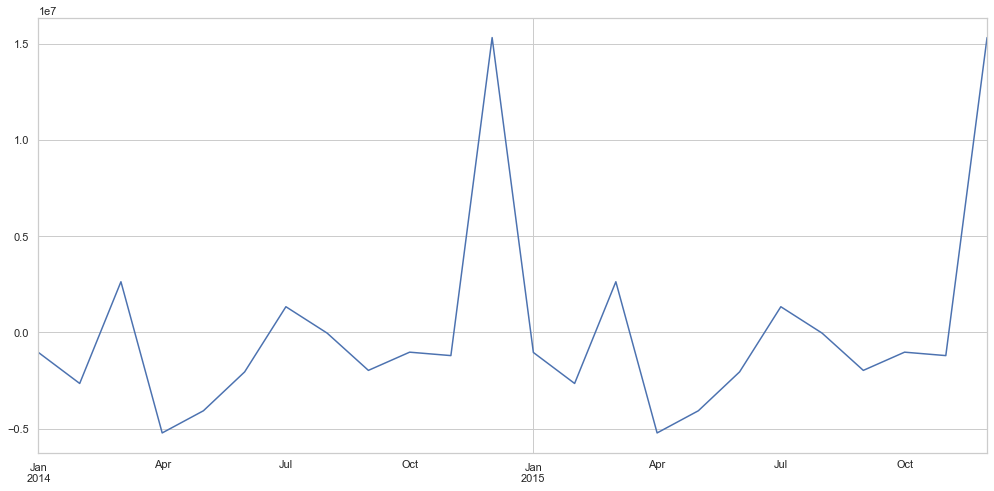

Группа Центр
seasonal


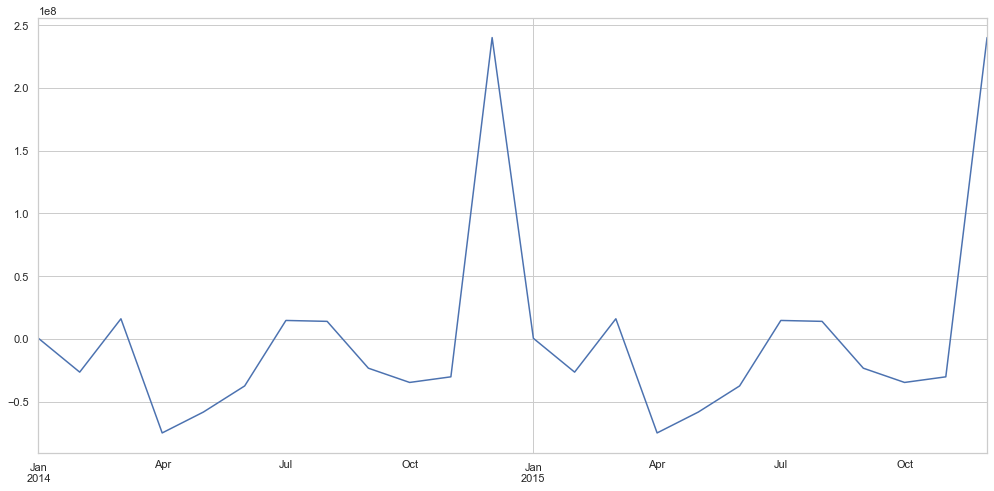

Группа Юг
seasonal


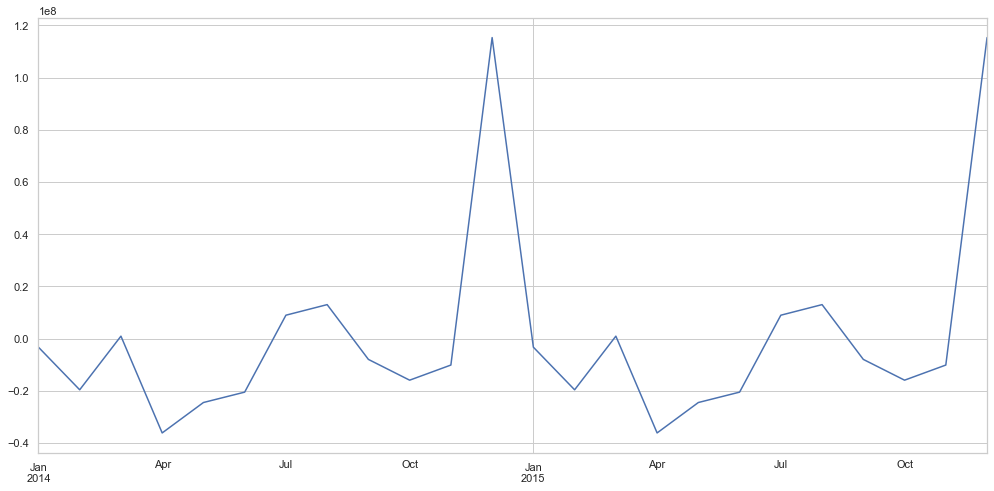

In [17]:
for column in first.columns: 
    print(column)
    decomposed_first = seasonal_decompose(first[column])
#     decomposed_first.trend.plot(figsize=figsize)
#     plt.show()
    print('seasonal')
    decomposed_first.seasonal.plot(figsize=figsize)
    plt.show()
#     print('resid')
#     decomposed_first.resid.plot(figsize=figsize)
#     plt.show()
#     print('-------------------------------------')

Видим, что графики выделенной нами сезонности у всех групп имеют одинаковую форму: годовую, с максимумом в конце года.

Пользуясь формулой индекса сезонности, как отклонения сезонного уровня (в данном случае, месяца) от среднего по группе за весь период, построим таблицу индексов и выгрузим ее в xls-файл.

In [18]:
index=first.copy()
for column in index.columns: 
    index[column]=(index[column]/index[column].mean())
index.to_excel('season.xlsx')

In [19]:
index

,Группа Кавказских республик,Группа Абакан,Группа Астрахань,Группа Волгоград,Группа Ейск,Группа Ессентуки,Группа Новороссийск,Группа Приморских объектов,Группа Пятигорск,Группа Ростов,Группа СПБ,Группа Север,Группа Сибирь,Группа Улан-Удэ,Группа Центр,Группа Юг
2014-01-01,0.823995,0.781512,0.703711,0.921812,0.55055,0.757638,0.854709,0.819747,0.928638,0.716248,0.591976,0.561859,0.749399,0.900209,0.58446,0.587581
2014-02-01,0.789743,0.906623,0.635771,0.930797,0.582711,0.629035,0.817627,0.99223,0.799671,0.743389,0.693599,0.6876,0.755797,0.730037,0.58896,0.61358
2014-03-01,1.151844,1.430535,0.978496,1.228373,0.80249,1.0395,1.1413,1.236117,1.047102,0.99221,0.94658,0.966727,1.041324,1.080503,0.798235,0.882099
2014-04-01,0.756299,0.771691,0.71595,0.777293,0.603791,0.675106,0.662835,0.708707,0.779801,0.6922,0.574758,0.613431,0.671904,0.616004,0.554367,0.650119
2014-05-01,0.773289,0.844043,0.758525,0.86684,0.691184,0.743646,0.715202,0.708029,0.796705,0.762724,0.680835,0.76692,0.750364,0.635081,0.64575,0.736105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,1.063092,1.098057,1.300322,1.102941,1.857392,1.312938,1.186499,1.438191,1.093817,1.18627,1.034295,0.886456,1.041649,1.233933,1.205568,1.274229
2015-09-01,1.01352,0.810821,1.117182,0.966616,1.074552,0.963559,1.082802,1.296676,0.906026,1.084594,0.955579,0.889651,0.921146,0.884262,1.06948,1.112053
2015-10-01,0.935638,0.83339,1.021894,0.908488,0.766681,1.049314,0.801683,0.93818,0.908823,0.978581,0.872899,0.872738,0.875238,0.952504,0.98847,1.009295
2015-11-01,0.892066,0.728637,0.963569,0.861433,0.755776,0.872045,0.873851,0.738037,0.926444,1.017276,0.893361,0.928474,0.873057,0.81764,1.005995,0.974939


## Вычислить прирост по сопоставимым объектам 2015 к 2014 итого и в разрезе групп городов

Сопоставимыми объектами считаются объекты, которые работали в рассматриваемый и сравниваемый периоды.

Т.к. мы рассматриваем полностью 2014 и 2015 гг., удалим объекты (магазины), которые не работали какую-то часть времени.

In [20]:
second=df.dropna()

In [21]:
df.shape, second.shape

((621, 26), (367, 26))

In [22]:
print(df.shape[0]-second.shape[0], 'магазина были удалены, т.к. не имеют данных за какой-либо месяц из периода анализа.')

254 магазина были удалены, т.к. не имеют данных за какой-либо месяц из периода анализа.


367 осталось, их и рассмотрим.

In [23]:
second.head()

,ГруппаГородов,Наименование,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00
0,Группа Центр,Магазин1,2051471.82,2.088814e+06,2608636.43,1565837.40,1.960246e+06,2300439.0,2936732.0,2.691153e+06,2.306721e+06,2310321.0,2.316974e+06,4283870.00,2522452.00,2189702.0,2776494.0,1755103.00,1671256.0,2140830.00,2745071.00,2632203.15,2394626.00,2313150.0,2116280.0,3733057.0
1,Группа Центр,Магазин2,1056850.65,1.030067e+06,1222410.00,834458.00,7.410119e+05,904829.0,1128726.0,9.909854e+05,7.857755e+05,953814.0,1.043476e+06,1890696.10,980394.00,1010764.0,981789.0,827937.00,653909.0,800825.00,898351.00,1105953.00,740972.00,957128.0,926492.0,1536261.0
2,Группа Центр,Магазин3,2962284.04,3.752589e+06,4902779.59,3048335.00,2.791383e+06,3688463.0,3939424.5,3.066854e+06,3.340698e+06,2943383.0,2.696018e+06,6495887.00,3463449.00,3394834.0,3697708.0,2966511.00,2519220.0,2835232.00,2962883.00,2772081.25,2625504.00,2571363.0,2998352.0,4872285.0
3,Группа Центр,Магазин4,2558608.27,2.600523e+06,3335103.19,2456693.60,2.821844e+06,3434487.0,3545213.0,3.829394e+06,2.865735e+06,3005159.0,3.302328e+06,4715654.50,2893357.55,2360918.0,2986211.0,1826463.00,2241688.0,2612168.16,2887199.00,3102668.00,2791696.00,2609489.0,2076329.0,4041529.0
4,Группа Центр,Магазин5,1996708.23,1.910105e+06,2561086.10,1510640.31,1.621828e+06,2339605.5,2245275.5,2.739182e+06,2.174367e+06,1728746.0,1.904784e+06,4319821.95,2591395.00,2230184.0,2782146.0,1609679.11,1978687.0,2092655.00,2605989.05,3118748.70,2177609.15,2143155.0,2123343.0,4429868.0


In [24]:
second.isna().sum()

ГруппаГородов          0
Наименование           0
2014-01-01 00:00:00    0
2014-02-01 00:00:00    0
2014-03-01 00:00:00    0
                      ..
2015-08-01 00:00:00    0
2015-09-01 00:00:00    0
2015-10-01 00:00:00    0
2015-11-01 00:00:00    0
2015-12-01 00:00:00    0
Length: 26, dtype: int64

### по отдельным магазинам

In [25]:
second1 = second.pivot_table(index=['Наименование'], values = date_index, aggfunc='sum').reset_index().T
second1.columns = second1.iloc[0].to_list()
second1.drop(labels = 'Наименование', axis = 0, inplace=True)
second1.index = pd.to_datetime(second1.index)

In [26]:
shops = pd.DataFrame(second1.iloc[13:].sum() / second1.iloc[0:12].sum(), columns=['Прирост 2015 к 2014'])
shops.head()

,Прирост 2015 к 2014
Магазин1,0.899615
Магазин100,0.896744
Магазин101,0.955274
Магазин102,0.904226
Магазин103,0.862705


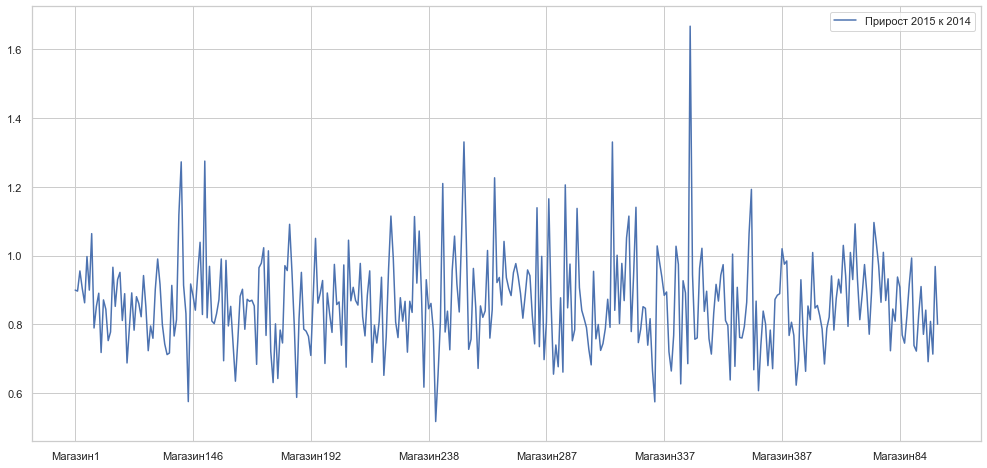

In [27]:
shops.plot(figsize=figsize)
plt.show()

In [28]:
shops.median()

Прирост 2015 к 2014    0.853468
dtype: float64

Получили таблицу приростов (судя по начальным строчкам, и построенному навскидку графику, скорее, отрицательных - т.к. основная часть линии лежит ниже единицы, и медиана по коэффициенту 0.85), выгрузим ее в xls-файл.

Правда, есть значения более 1.6 (в чем их секрет? :)

In [29]:
shops.to_excel('second_shops.xls')

### по группам городов

In [30]:
second

,ГруппаГородов,Наименование,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00
0,Группа Центр,Магазин1,2051471.82,2.088814e+06,2608636.43,1565837.40,1.960246e+06,2300439.00,2936732.0,2.691153e+06,2.306721e+06,2310321.0,2.316974e+06,4283870.00,2522452.00,2189702.0,2776494.0,1755103.00,1671256.0,2140830.00,2745071.00,2632203.15,2394626.00,2313150.0,2116280.0,3733057.0
1,Группа Центр,Магазин2,1056850.65,1.030067e+06,1222410.00,834458.00,7.410119e+05,904829.00,1128726.0,9.909854e+05,7.857755e+05,953814.0,1.043476e+06,1890696.10,980394.00,1010764.0,981789.0,827937.00,653909.0,800825.00,898351.00,1105953.00,740972.00,957128.0,926492.0,1536261.0
2,Группа Центр,Магазин3,2962284.04,3.752589e+06,4902779.59,3048335.00,2.791383e+06,3688463.00,3939424.5,3.066854e+06,3.340698e+06,2943383.0,2.696018e+06,6495887.00,3463449.00,3394834.0,3697708.0,2966511.00,2519220.0,2835232.00,2962883.00,2772081.25,2625504.00,2571363.0,2998352.0,4872285.0
3,Группа Центр,Магазин4,2558608.27,2.600523e+06,3335103.19,2456693.60,2.821844e+06,3434487.00,3545213.0,3.829394e+06,2.865735e+06,3005159.0,3.302328e+06,4715654.50,2893357.55,2360918.0,2986211.0,1826463.00,2241688.0,2612168.16,2887199.00,3102668.00,2791696.00,2609489.0,2076329.0,4041529.0
4,Группа Центр,Магазин5,1996708.23,1.910105e+06,2561086.10,1510640.31,1.621828e+06,2339605.50,2245275.5,2.739182e+06,2.174367e+06,1728746.0,1.904784e+06,4319821.95,2591395.00,2230184.0,2782146.0,1609679.11,1978687.0,2092655.00,2605989.05,3118748.70,2177609.15,2143155.0,2123343.0,4429868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Группа Центр,Магазин384,575384.00,2.458439e+06,2881373.00,1973966.00,2.399269e+06,3018184.00,2767569.5,2.668880e+06,1.911530e+06,1858327.0,2.156515e+06,4818601.00,3112450.00,2287767.0,2264086.0,1555228.00,1590204.0,1920500.00,2269342.00,2807914.00,2551367.00,2340957.0,2069769.0,4075293.0
384,Группа Приморских объектов,Магазин385,311045.00,3.702515e+06,4273679.00,2454822.00,2.697684e+06,2932765.00,3434612.0,3.733011e+06,3.509801e+06,2906845.0,2.370688e+06,7027086.40,3439149.00,2642052.0,3545553.0,2857449.00,3000359.0,2457041.00,3102751.95,3471094.00,3379699.00,3336734.0,2196264.0,4826491.0
385,Группа Приморских объектов,Магазин386,169765.00,8.523029e+05,1856402.00,874095.00,1.172198e+06,1566316.00,1975101.0,1.586220e+06,1.260710e+06,1399438.0,1.355183e+06,4036719.55,2095776.00,1704664.0,1737768.0,1149801.00,793159.0,1025185.25,1005138.95,2159138.35,1751177.00,1861429.0,858816.0,2050571.0
386,Группа Центр,Магазин387,29262.00,1.667851e+06,1906816.47,1062497.00,1.214387e+06,1878438.00,1718322.0,1.781129e+06,1.722356e+06,1587782.0,1.770171e+06,3252392.00,2307409.00,1736164.0,1916725.2,1263706.00,1910772.0,1865657.00,2200775.00,1537282.00,1692869.00,1414862.0,1586730.0,2855223.0


In [31]:
second2 = second.pivot_table(index=['ГруппаГородов'], values = date_index, aggfunc='sum').reset_index().T
second2.columns = second2.iloc[0].to_list()
second2.drop(labels = 'ГруппаГородов', axis = 0, inplace=True)
second2.index = pd.to_datetime(second2.index)

In [32]:
second2

,Группа Кавказских республик,Группа Абакан,Группа Астрахань,Группа Волгоград,Группа Ейск,Группа Ессентуки,Группа Новороссийск,Группа Приморских объектов,Группа Пятигорск,Группа Ростов,Группа СПБ,Группа Север,Группа Сибирь,Группа Улан-Удэ,Группа Центр,Группа Юг
2014-01-01,22364316.35,5025913.21,16513540.38,31400438.61,4767885.67,1817022.2,9434949.47,36642498.83,6976293.5,75173416.74,61207324.45,76843769.04,246811237.5,15581667.79,134442483.08,66920774.36
2014-02-01,21434669.521387,5830502.45412,14919235.387924,31706491.489083,5046409.938633,1508596.590626,9025609.772988,44500815.780005,6007443.420173,78021917.084369,69522478.697801,93550013.539422,248271533.817791,12636159.280381,134399200.928739,63835793.601552
2014-03-01,31262568.88,9199788.31,22961749.89,41843045.31,6949743.45,2493003.0,12598567.5,54837030.81,7866242.19,104136831.94,91349591.86,127683014.57,335528772.74,18702362.25,180874970.53,87890805.33
2014-04-01,20526970.46,4962753.3,16800760.93,26477562.36,5228965.92,1619087.0,7316894.0,31187149.13,5858173.5,70080697.38,55469638.28,75166051.76,200147573.84,10662382.78,117365747.51,59263420.03
2014-05-01,20988088.074558,5428055.749135,17799843.433422,29527879.01662,5985809.777888,1783466.685425,7894958.609809,31213558.171917,5985160.686111,74337277.876337,61670581.074239,76033122.514014,215283006.277278,10992574.900232,126451593.724576,64459085.924813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,25724929.0,7061622.8,30513841.3,37570383.4,16085432.25,3148782.15,13097509.3,65463200.2,7443012.0,100222388.7,80337114.55,67373935.15,268047165.7,18866277.25,173405248.4,94194597.7
2015-09-01,24316523.05,5214399.0,26216220.6,32926622.0,9305859.0,2310876.0,11952814.65,59019516.9,6021085.0,91407855.05,73690863.2,65541670.72,233443920.58,12820157.0,155379038.4,82941671.35
2015-10-01,22461524.0,5359545.0,22708734.48,30410147.0,6639628.0,2516541.0,8849602.0,42628298.0,6098078.0,82976601.0,66714676.0,64342030.5,221241555.1,14089626.0,139866582.0,75761495.55
2015-11-01,21287130.0,4685874.0,21217456.3,28477593.0,6545193.0,2091402.0,9646254.0,33607561.0,6170137.0,82089003.0,68780462.0,67588048.0,218526264.21,11885661.0,142979987.0,73369709.0


In [33]:
groups = pd.DataFrame(second2.iloc[13:].sum() / second2.iloc[0:12].sum(), columns=['Прирост 2015 к 2014'])
groups

,Прирост 2015 к 2014
Группа Кавказских республик,0.793183
Группа Абакан,0.836452
Группа Астрахань,1.037984
Группа Волгоград,0.850383
Группа Ейск,0.947458
Группа Ессентуки,0.973813
Группа Новороссийск,0.918861
Группа Приморских объектов,0.8692
Группа Пятигорск,0.828532
Группа Ростов,0.8871


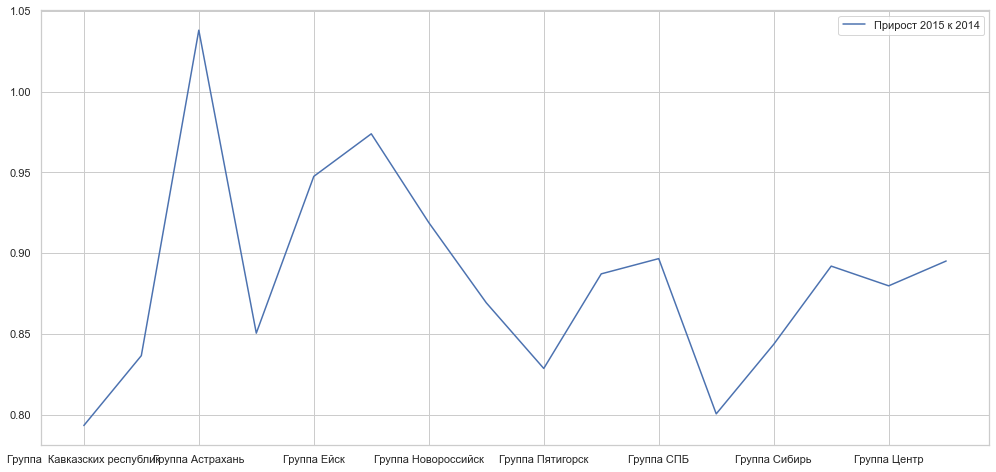

In [34]:
groups.plot(figsize=figsize)
plt.show()

In [35]:
groups.sort_values(by='Прирост 2015 к 2014', ascending=False)

,Прирост 2015 к 2014
Группа Астрахань,1.037984
Группа Ессентуки,0.973813
Группа Ейск,0.947458
Группа Новороссийск,0.918861
Группа СПБ,0.896545
Группа Юг,0.895065
Группа Улан-Удэ,0.891894
Группа Ростов,0.8871
Группа Центр,0.879691
Группа Приморских объектов,0.8692


Только группа Астрахань превысила значение 2014-го года в 2015-м, остальные не смогли.

In [36]:
groups.to_excel('second_groups.xls')